# Plot distribution of information density

Johann Brehmer, Kyle Cranmer, Marco Farina, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import os

import madminer.core
from madminer.fisherinformation import FisherInformation, profile_information, project_information


In [2]:
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [3]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_4/'

In [4]:
sample_dir = base_dir + 'data/samples/wgamma_sys/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma_sys/'
log_dir = base_dir + 'logs/wgamma/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'
model_dir = base_dir + 'data/models/wgamma_sys/'
result_dir = base_dir + 'data/results/wgamma_sys/'

## Main function

In [5]:
def calculate_info_distribution(
    observable, 
    nbins,
    histrange,
    component='det',
    madminer_file='samples.h5',
    model_file=None,
    luminosity=300000.0,
):
    fisher = FisherInformation(madminer_file)
    
    boundaries, xsecs, rate_infos, full_infos = fisher.histogram_of_fisher_information(
        theta=np.array([0.,0.]),
        observable=observable,
        nbins=nbins,
        histrange=histrange,
        model_file=model_file,
        luminosity=luminosity,
        cuts=None,
        efficiency_functions=None,
        batch_size=100000,
        test_split=0.5,
    )
    
    if component == 'det':
        rate_infos = [np.linalg.det(inf) for inf in rate_infos]
        full_infos = [np.linalg.det(inf) for inf in full_infos]
    else:
        rate_infos = [inf[component[0], component[1]] for inf in rate_infos]
        full_infos = [inf[component[0], component[1]] for inf in full_infos]
        
    return boundaries, xsecs, rate_infos, full_infos


## Observables

In [37]:
observables = ['et_miss', 'pt_a1', 'pt_l1']
obs_min     = [       0.,      0.,      0.]
obs_max     = [     600.,    600.,    600.]
obs_labels  = [    'MET',r'$p_T(\gamma)$',r'$p_T(\ell)$']

nbins = 20

## Settings

In [42]:
i_ref = 0

madminer_files = ['samples.h5', 'samples_tight.h5', 'samples_antitight.h5', "samples_tight.h5"]
model_files    = ["sally_ensemble_all", "sally_ensemble_all_tight", "sally_ensemble_all_antitight", "sally_ensemble_pta_phi_tight"]

inf_labels = ["all", "cuts", "fail cuts", r"$\varphi, p_T(\gamma)$"]

linestyles = ['-', '--', '-.', '--']
colors     = ['mediumblue', 'darkgreen', 'red', 'darkorange']

In [39]:
component=(0,0)
luminosity=30000.0

## Calculate Fisher infos

In [40]:
all_infos = []
all_xsecs = []
all_boundaries = []

for madminer_file, model_file in zip(madminer_files, model_files):
    model_infos = []
    model_xsecs = []
    model_boundaries = []
    
    for obs, omin, omax in zip(observables, obs_min, obs_max):
        boundaries, xsecs, _, full_infos = calculate_info_distribution(
            observable=obs, 
            nbins=nbins,
            histrange=(omin, omax),
            component=component,
            madminer_file=sample_dir + madminer_file,
            model_file=model_dir + model_file,
            luminosity=luminosity,
        )
        
        model_boundaries.append(boundaries)
        model_infos.append(full_infos)
        model_xsecs.append(xsecs)
    
    all_infos.append(model_infos)
    all_xsecs.append(model_xsecs)
    all_boundaries.append(model_boundaries)


21:29 madminer.fisherinfor INFO    Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma_sys/samples.h5
21:29 madminer.fisherinfor INFO    Found 2 parameters
21:29 madminer.fisherinfor INFO    Found 32 nuisance parameters
21:29 madminer.fisherinfor INFO    Found 45 benchmarks, of which 6 physical
21:29 madminer.fisherinfor INFO    Found 33 observables: et_miss, phi_miss, e_visible, eta_visible, e_l1, pt_l1, eta_l1, phi_l1, e_a1, pt_a1, eta_a1, phi_a1, e_j1, pt_j1, eta_j1, phi_j1, pdgid_l1, m_la, m_lmet, m_amet, pt_la, pt_lmet, pt_amet, deltaphi_la, deltaphi_lmet, deltaphi_amet, deltaeta_la, m_almet, pt_almet, mt, phi_minus, phi_plus, phi
21:29 madminer.fisherinfor INFO    Found 1341798 events
21:29 madminer.fisherinfor INFO    Found morphing setup with 6 components
21:29 madminer.fisherinfor INFO    Found nuisance morphing setup
21:29 madminer.ml          INFO    Found ensemble with 10 estimators and expectations None
21:29 madminer.fisherinfo

21:44 madminer.fisherinfor INFO    Found 2 parameters
21:44 madminer.fisherinfor INFO    Found 32 nuisance parameters
21:44 madminer.fisherinfor INFO    Found 45 benchmarks, of which 6 physical
21:44 madminer.fisherinfor INFO    Found 33 observables: et_miss, phi_miss, e_visible, eta_visible, e_l1, pt_l1, eta_l1, phi_l1, e_a1, pt_a1, eta_a1, phi_a1, e_j1, pt_j1, eta_j1, phi_j1, pdgid_l1, m_la, m_lmet, m_amet, pt_la, pt_lmet, pt_amet, deltaphi_la, deltaphi_lmet, deltaphi_amet, deltaeta_la, m_almet, pt_almet, mt, phi_minus, phi_plus, phi
21:44 madminer.fisherinfor INFO    Found 793714 events
21:44 madminer.fisherinfor INFO    Found morphing setup with 6 components
21:44 madminer.fisherinfor INFO    Found nuisance morphing setup
21:44 madminer.ml          INFO    Found ensemble with 10 estimators and expectations None
21:44 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 4
21:44 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch

21:51 madminer.fisherinfor INFO    Found 793714 events
21:51 madminer.fisherinfor INFO    Found morphing setup with 6 components
21:51 madminer.fisherinfor INFO    Found nuisance morphing setup
21:51 madminer.ml          INFO    Found ensemble with 10 estimators and expectations None
21:51 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 4
21:52 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 2 / 4
21:52 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 3 / 4
21:52 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 4 / 4


## Main plot distributions

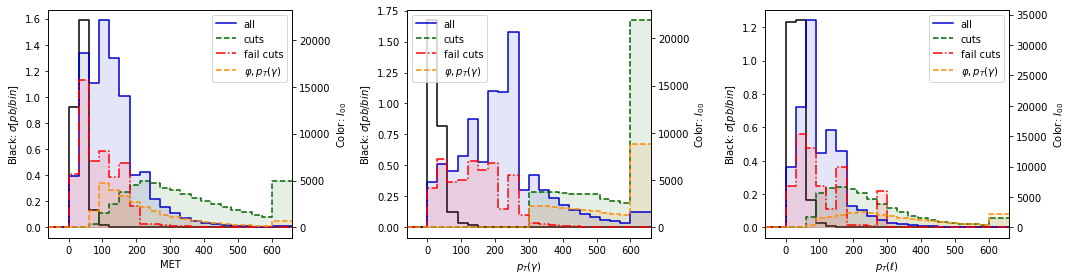

In [48]:
fig = plt.figure(figsize=(15,4))

for i_obs, (obs, omin, omax) in enumerate(zip(obs_labels, obs_min, obs_max)):
    ax1 = plt.subplot(1,3,i_obs+1)
    
    boundaries = np.repeat(all_boundaries[i_ref][i_obs],2)
    xsec = np.repeat(all_xsecs[i_ref][i_obs], 2)
    boundaries = np.hstack([[3*boundaries[0]-2* boundaries[2]], boundaries, [3*boundaries[-1]-2*boundaries[-3]]])
    
    plt.plot(boundaries, xsec, lw=1.5, c='black', label='xsec')
    
    ax2 = plt.twinx(ax=ax1)
    
    for i_model, (inf_label, color, ls) in enumerate(zip(inf_labels, colors, linestyles)):
        infos = all_infos[i_model][i_obs]
        infos = np.repeat(infos, 2)
        
        plt.fill_between(boundaries, 0., infos, alpha=0.1, color=color.format(i_model))
        plt.plot(boundaries, infos, lw=1.5, ls=ls, c=color, label=inf_label)
        
    ax1.set_ylabel(r'Black: $\sigma [pb / bin]$')
    ax2.set_ylabel(r'Color: $I_{00}$')
    ax1.set_xlabel(obs)
    
    plt.xlim(boundaries[0], boundaries[-1])
    
    plt.legend()

plt.tight_layout()
plt.savefig('../../figures/wgamma/distribution_of_information.pdf')
